In [42]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sairaluqman","key":"263b83d410bf3ea3e7f093128cbba25f"}'}

In [37]:
! pip install -q kaggle

In [44]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [43]:
import os
os.listdir()

['.config', 'kaggle.json', 'sample_data']

In [ ]:
!unzip fruits.zip

In [47]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive

In [65]:
#Setting Training & Test dir paths
train_path = '/content/fruits-360_dataset/fruits-360/Training/'
test_path = '/content/fruits-360_dataset/fruits-360/Test'


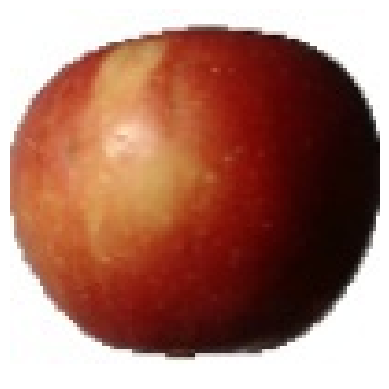

(100, 100, 3)


In [66]:
#Displaying the image
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array
x = img_to_array(img)
print(x.shape)

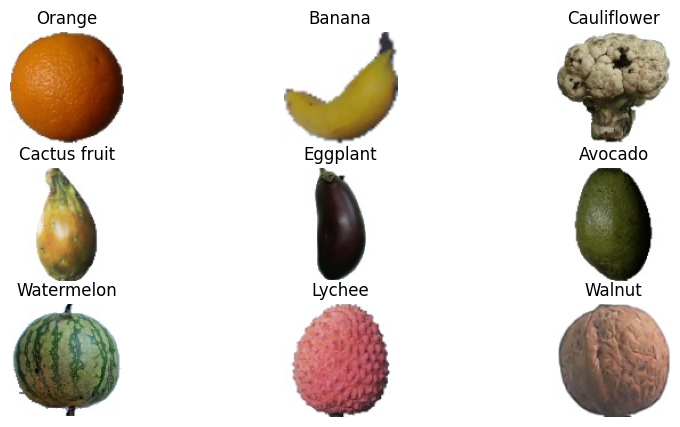

In [67]:
#Visualizing more Images
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

In [68]:
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(train_path):
    for image_filename in os.listdir(train_path + i):
        fruits.append(i)
        fruits_image.append(i + '/' + image_filename)
#Finding top 10 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(10)
print("Top 10 frequent Fruits:")
frequent_fruits

Top 10 frequent Fruits:


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry Rainier', 738),
 ('Tomato 1', 738),
 ('Strawberry Wedge', 738),
 ('Peach 2', 738),
 ('Tomato 3', 738),
 ('Cherry 2', 738),
 ('Melon Piel de Sapo', 738),
 ('Walnut', 735)]

In [69]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [ ]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))
#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])
#Getting model's summary
model.summary()

In [79]:
#Specifing epochs & batch size
epochs = 45
batch_size = 64

In [80]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [81]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

<ipython-input-81-54a208a15b62>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/45
25/25 [==============================] - 33s 1s/step - loss: 1.3210 - accuracy: 0.6019 - val_loss: 1.3388 - val_accuracy: 0.5990
Epoch 2/45
25/25 [==============================] - 43s 2s/step - loss: 1.2235 - accuracy: 0.6056 - val_loss: 1.4346 - val_accuracy: 0.5273
Epoch 3/45
25/25 [==============================] - 35s 1s/step - loss: 1.1556 - accuracy: 0.6475 - val_loss: 0.9977 - val_accuracy: 0.7122
Epoch 4/45
25/25 [==============================] - 34s 1s/step - loss: 1.0343 - accuracy: 0.6637 - val_loss: 0.8303 - val_accuracy: 0.7461
Epoch 5/45
25/25 [==============================] - 35s 1s/step - loss: 1.0588 - accuracy: 0.6806 - val_loss: 0.7757 - val_accuracy: 0.7943
Epoch 6/45
25/25 [==============================] - 34s 1s/step - loss: 0.8815 - accuracy: 0.7113 - val_loss: 0.5086 - val_accuracy: 0.8385
Epoch 7/45
25/25 [==============================] - 31s 1s/step - loss: 0.8269 - accuracy: 0.7538 - val_loss: 0.8301 - val_accuracy: 0.7409
Epoch 8/45
25/25 [==

In [45]:
!kaggle datasets download -d moltean/fruits



100% 1.28G/1.28G [00:20<00:00, 38.7MB/s]
100% 1.28G/1.28G [00:20<00:00, 65.8MB/s]


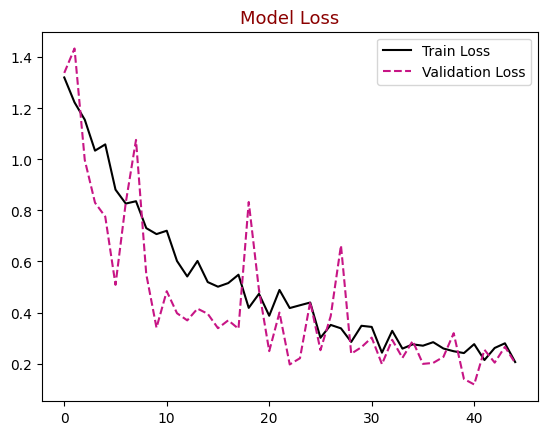

In [82]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

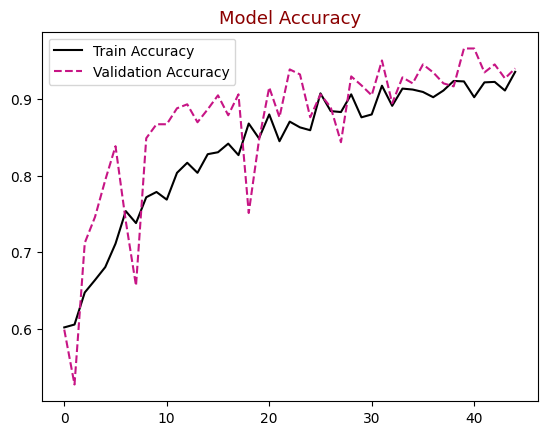

In [83]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

# New Section

# New Section

# New Section